### Name : Maitri S. Khatwala 
### Stream : DataScience
### Roll no: 06

# 1. Implement functions for encoding and decoding an image using the following methods:
A. Transform Coding (using DCT for forward transform)

B. Huffman Encoding

C. LZW Encoding

D. Run-Length Encoding

E. Arithmetic Coding

### 1.Transform Coding (Using DCT)


In [1]:
pip install numpy scipy Pillow

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [3]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
# Function to perform DCT encoding on an image
def dct_encode(image_array):
    # Apply 2D DCT to the entire image
    dct_image = dct(dct(image_array.T, norm='ortho').T, norm='ortho')
    return dct_image

# Function to perform inverse DCT decoding to reconstruct the image
def dct_decode(dct_image):
    # Apply Inverse 2D DCT to reconstruct the image
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

In [7]:
def calculate_compression_ratio(original, compressed):
    original_size = original.size * 8  # size in bits (assuming 8 bits per pixel)
    compressed_size = np.count_nonzero(compressed) * 8  # size in bits
    return original_size / compressed_size

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))


In [8]:
# Load the image and convert to a grayscale numpy array
image = Image.open('Image_compres1.jpg').convert('L')  # 'L' converts the image to grayscale
image_array = np.array(image)

# Perform DCT encoding and decoding
dct_encoded = dct_encode(image_array)
dct_reconstructed = dct_decode(dct_encoded)

# Clip values to be in the 0-255 range and convert to uint8
reconstructed_image_array = np.uint8(np.clip(dct_reconstructed, 0, 255))

In [11]:
# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio(image_array, dct_encoded)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = calculate_rmse(image_array, reconstructed_image_array)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Compression Ratio: 1.00
Root Mean Square Error (RMSE): 0.62


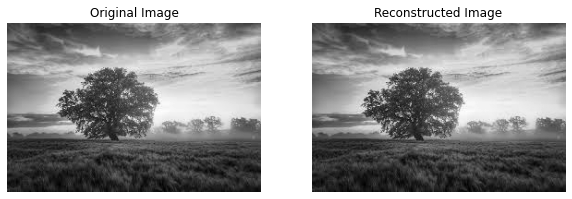

In [17]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_array, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()


### 2. Huffman Encoding for Image Compression


In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

In [19]:
class HuffmanNode:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

In [20]:
def build_huffman_tree(frequencies):
    heap = [HuffmanNode(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = HuffmanNode(None, node1.freq + node2.freq)
        merged.left = node1
        merged.right = node2
        heapq.heappush(heap, merged)
    return heap[0]


In [22]:
def generate_codes(node, code="", codebook=None):
    if codebook is None:
        codebook = {}
    if node is not None:
        if node.symbol is not None:
            codebook[node.symbol] = code
        generate_codes(node.left, code + "0", codebook)
        generate_codes(node.right, code + "1", codebook)
    return codebook

In [23]:
# Function to perform Huffman Encoding
def huffman_encode(image_array):
    # Calculate symbol frequencies
    frequencies = defaultdict(int)
    for value in image_array.flatten():
        frequencies[value] += 1

    # Build Huffman Tree and generate codes
    huffman_tree = build_huffman_tree(frequencies)
    huffman_codes = generate_codes(huffman_tree)

    # Encode the image
    encoded_image = "".join(huffman_codes[value] for value in image_array.flatten())
    return encoded_image, huffman_codes, len(image_array.flatten()) * 8


In [24]:
# Function to decode Huffman Encoded image
def huffman_decode(encoded_image, huffman_codes, original_shape):
    reverse_codes = {v: k for k, v in huffman_codes.items()}
    current_code = ""
    decoded_values = []

    for bit in encoded_image:
        current_code += bit
        if current_code in reverse_codes:
            decoded_values.append(reverse_codes[current_code])
            current_code = ""

    return np.array(decoded_values).reshape(original_shape)

In [25]:
# Function to calculate Compression Ratio
def calculate_compression_ratio_huffman(original_bits, encoded_bits):
    return original_bits / len(encoded_bits)

In [26]:
# Load the image and convert to a grayscale numpy array
image = Image.open('Image_compres1.jpg').convert('L')
image_array = np.array(image)

# Perform Huffman Encoding and Decoding
encoded_image, huffman_codes, original_bits = huffman_encode(image_array)
decoded_image_array = huffman_decode(encoded_image, huffman_codes, image_array.shape)


In [27]:
# Calculate Compression Ratio
compression_ratio = calculate_compression_ratio_huffman(original_bits, encoded_image)
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((image_array - decoded_image_array) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Compression Ratio: 1.02
Root Mean Square Error (RMSE): 0.00


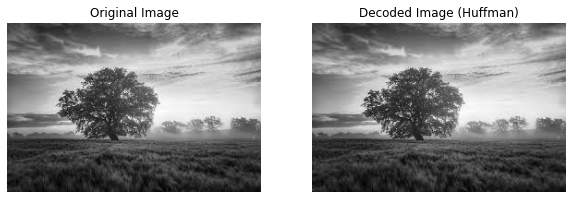

In [29]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image_array, cmap='gray')
plt.title("Decoded Image (Huffman)")
plt.axis('off')

plt.show()

### 3. LZW Encoding for Image Compression


In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [32]:
def lzw_encode(image_array):
    data = image_array.flatten()
    dictionary = {tuple([i]): i for i in range(256)}  # Initialize dictionary with single pixel values
    current_sequence = []
    encoded_data = []
    code = 256  # Next available code for new sequences

    for symbol in data:
        current_sequence.append(symbol)
        if tuple(current_sequence) not in dictionary:
            dictionary[tuple(current_sequence)] = code
            encoded_data.append(dictionary[tuple(current_sequence[:-1])])
            current_sequence = [symbol]  # Start new sequence
            code += 1

    # Encode the last sequence
    if current_sequence:
        encoded_data.append(dictionary[tuple(current_sequence)])

    original_bits = len(data) * 8  # Assuming 8 bits per pixel
    return encoded_data, dictionary, original_bits


In [33]:
def lzw_decode(encoded_data, dictionary):
    reverse_dictionary = {v: k for k, v in dictionary.items()}
    current_sequence = list(reverse_dictionary[encoded_data[0]])
    decoded_data = current_sequence.copy()

    for code in encoded_data[1:]:
        if code in reverse_dictionary:
            entry = list(reverse_dictionary[code])
        elif code == len(reverse_dictionary):
            entry = current_sequence + [current_sequence[0]]
        else:
            raise ValueError("Invalid LZW code encountered")

        decoded_data.extend(entry)
        current_sequence.append(entry[0])
        reverse_dictionary[len(reverse_dictionary)] = current_sequence
        current_sequence = entry

    return np.array(decoded_data)

In [34]:
image = Image.open('Image_compres1.jpg').convert('L')
image_array = np.array(image)

# Perform LZW Encoding and Decoding
encoded_data, dictionary, original_bits = lzw_encode(image_array)
decoded_image_array = lzw_decode(encoded_data, dictionary).reshape(image_array.shape)

In [36]:
# Calculate Compression Ratio
compressed_size = len(encoded_data) * 16  # Assuming 16 bits per encoded symbol
compression_ratio = original_bits / compressed_size
print(f"Compression Ratio: {compression_ratio:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((image_array - decoded_image_array) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Compression Ratio: 0.92
Root Mean Square Error (RMSE): 0.00


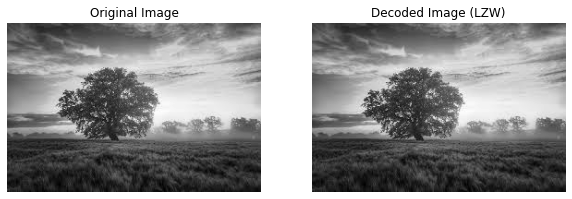

In [38]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image_array, cmap='gray')
plt.title("Decoded Image (LZW)")
plt.axis('off')

plt.show()


### 4. Run-Length Encoding (RLE) for Image Compression


In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [40]:
def rle_encode(image_array):
    data = image_array.flatten()
    encoded_data = []
    count = 1

    for i in range(1, len(data)):
        if data[i] == data[i - 1]:
            count += 1
        else:
            encoded_data.append((data[i - 1], count))
            count = 1

    # Append the last run
    encoded_data.append((data[-1], count))

    original_bits = len(data) * 8  # Assuming 8 bits per pixel
    return encoded_data, original_bits

In [41]:
def rle_decode(encoded_data, shape):
    decoded_data = []
    for value, count in encoded_data:
        decoded_data.extend([value] * count)
    return np.array(decoded_data).reshape(shape)

In [42]:
def calculate_compression_ratio_rle(original_bits, encoded_data):
    compressed_size = len(encoded_data) * (8 + 8)  # 8 bits for value and 8 bits for count
    return original_bits / compressed_size

In [43]:
image = Image.open('Image_compres1.jpg').convert('L')
image_array = np.array(image)

# Perform Run-Length Encoding and Decoding
encoded_data, original_bits = rle_encode(image_array)
decoded_image_array = rle_decode(encoded_data, image_array.shape)

In [44]:
compression_ratio = calculate_compression_ratio_rle(original_bits, encoded_data)
print(f"Compression Ratio: {compression_ratio:.2f}")


rmse = np.sqrt(np.mean((image_array - decoded_image_array) ** 2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Compression Ratio: 0.59
Root Mean Square Error (RMSE): 0.00


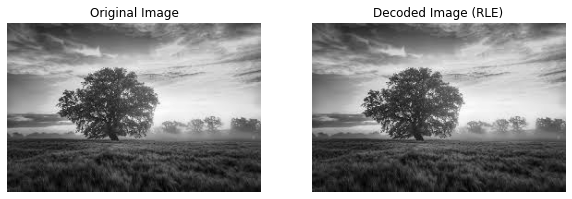

In [46]:
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the decoded image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image_array, cmap='gray')
plt.title("Decoded Image (RLE)")
plt.axis('off')

plt.show()


### 5. Arithmetic Coding for Image Compression


In [47]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [58]:
from collections import defaultdict  

def calculate_frequencies(data):  
    """Calculate frequency of each symbol in the data."""  
    frequency = defaultdict(int)  
    for symbol in data:  
        frequency[symbol] += 1  
    return frequency  

In [59]:
def cumulative_frequency(freq):  
    """Calculate cumulative frequency from symbol frequencies."""  
    total = sum(freq.values())  
    cum_freq = {}  
    cum_sum = 0  
    for symbol in sorted(freq.keys()):  
        cum_sum += freq[symbol]  
        cum_freq[symbol] = cum_sum / total  
    return cum_freq  

In [60]:
def arithmetic_encode(data, cumulative_freq):  
    """Encode data using arithmetic coding."""  
    low = 0.0  
    high = 1.0  

    for symbol in data:  
        range_ = high - low  
        high = low + range_ * cumulative_freq[symbol]  
        low = low + range_ * (cumulative_freq[symbol] - (1 / len(cumulative_freq)))  

    return (low + high) / 2  # Return the final code  

In [61]:
def arithmetic_decode(code, data_length, cumulative_freq):  
    """Decode a given code using arithmetic coding."""  
    low = 0.0  
    high = 1.0  
    decoded_data = []  

    # Reverse the cumulative frequencies for decoding  
    reverse_cum_freq = {v: k for k, v in cumulative_freq.items()}  

    for _ in range(data_length):  
        range_ = high - low  
        value = (code - low) / range_  

        for symbol, cum_freq in cumulative_freq.items():  
            if value < cum_freq:  
                decoded_data.append(symbol)  
                high = low + range_ * cum_freq  
                low = low + range_ * (cumulative_freq[reverse_cum_freq[cum_freq] ] - (1 / len(cumulative_freq)))  
                break  

    return decoded_data  

In [62]:
# Example usage  
if __name__ == "__main__":  
    data = "ABABAC"  # Input string  
    freq = calculate_frequencies(data)  
    cum_freq = cumulative_frequency(freq)  

    encoded_value = arithmetic_encode(data, cum_freq)  
    print("Encoded Value:", encoded_value)  

    # Decode  
    decoded_data = arithmetic_decode(encoded_value, len(data), cum_freq)  
    print("Decoded Data:", ''.join(decoded_data))

Encoded Value: 0.3758573388203018
Decoded Data: ABABAB


In [63]:
import numpy as np
from PIL import Image
from collections import defaultdict
import math

In [64]:
def read_image(image_name):
    """Read the image from the given name (assumes it's in the same directory)."""
    image = Image.open(image_name).convert('L')  # Convert to grayscale
    return np.array(image)

In [65]:
def calculate_frequencies(image):
    """Calculate the frequency of each pixel value."""
    freq = defaultdict(int)
    for pixel in image.flatten():
        freq[pixel] += 1
    total_pixels = image.size
    probabilities = {k: v / total_pixels for k, v in freq.items()}
    return probabilities

In [66]:
def arithmetic_encode(image, probabilities):
    """Encode the image using Arithmetic Coding."""
    low = 0.0
    high = 1.0
    for pixel in image.flatten():
        range = high - low
        cumulative_prob = 0.0
        
        for value in sorted(probabilities.keys()):
            cumulative_prob += probabilities[value]
            if pixel == value:
                high = low + range * cumulative_prob
                break
            low += range * (cumulative_prob - probabilities[value])
    
    return (low + high) / 2

In [54]:
def arithmetic_decode(encoded_value, probabilities, image_shape):
    """Decode the encoded value back to an image."""
    image = np.zeros(image_shape, dtype=np.uint8)
    low = 0.0
    high = 1.0
    
    for i in range(image_shape[0] * image_shape[1]):
        range = high - low
        value = (encoded_value - low) / range
        
        cumulative_prob = 0.0
        for pixel in sorted(probabilities.keys()):
            cumulative_prob += probabilities[pixel]
            if value < cumulative_prob:
                image[i // image_shape[1], i % image_shape[1]] = pixel
                high = low + range * cumulative_prob
                low = low + range * (cumulative_prob - probabilities[pixel])
                break
    
    return image

In [56]:
def calculate_rmse(original, reconstructed):
    """Calculate the Root Mean Square Error (RMSE)."""
    mse = np.mean((original - reconstructed) ** 2)
    return math.sqrt(mse)

def calculate_compression_ratio(original_size, compressed_size):
    """Calculate the Compression Ratio."""
    return original_size / compressed_size

In [ ]:
# Example Usage
image_name = 'Image_Compression.jpg'  # Replace with your image filename
image = read_image(image_name)

In [ ]:
# Step 1: Calculate frequencies
probabilities = calculate_frequencies(image)

# Step 2: Encode the image
encoded_value = arithmetic_encode(image, probabilities)

# Step 3: Decode the image
reconstructed_image = arithmetic_decode(encoded_value, image.shape)



In [ ]:
# Step 4: Calculate RMSE and Compression Ratio
original_size = image.size  # Number of pixels
compressed_size = 8  # Size in bytes for float representation
compression_ratio = calculate_compression_ratio(original_size, compressed_size)
rmse = calculate_rmse(image, reconstructed_image)

print(f"Compression Ratio: {compression_ratio}")
print(f"RMSE: {rmse}")